In [1]:
import pandas as pd

df = pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Análise exploratória dos dados

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


## Proporção da variável target

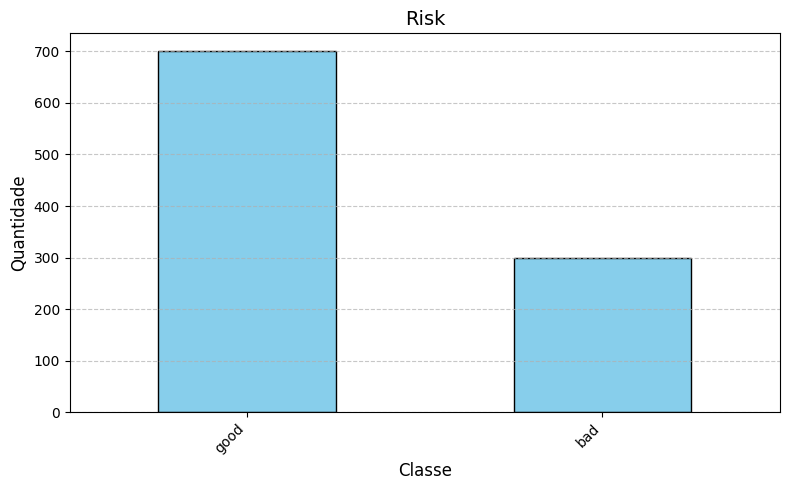

In [3]:
import matplotlib.pyplot as plt

risk_counts = df['Risk'].value_counts()
plt.figure(figsize=(8, 5))
risk_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Risk', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Relação da idade com o risco de crédito

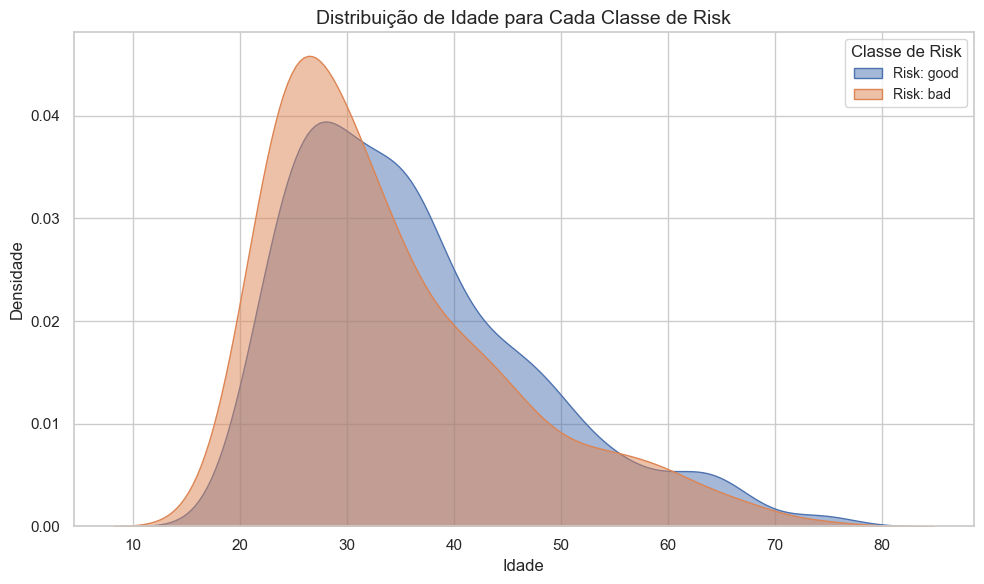

In [4]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for risk_class in df['Risk'].unique():
    sns.kdeplot(
        data=df[df['Risk'] == risk_class], 
        x='Age', 
        label=f'Risk: {risk_class}', 
        fill=True, 
        alpha=0.5
    )
plt.title('Distribuição de Idade para Cada Classe de Risk', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(title="Classe de Risk", fontsize=10)
plt.tight_layout()
plt.show()

## Relação do risco com o tipo de habitação

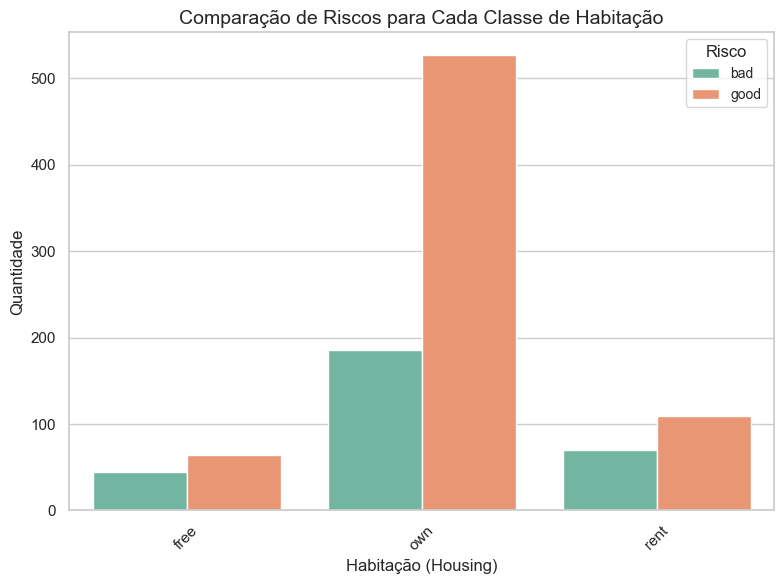

In [5]:
risk_housing_counts = df.groupby(['Housing', 'Risk']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(
    data=risk_housing_counts,
    x='Housing',
    y='Count',
    hue='Risk',
    palette='Set2'
)
plt.title('Comparação de Riscos para Cada Classe de Habitação', fontsize=14)
plt.xlabel('Habitação (Housing)', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.legend(title='Risco', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Relação do sexo com o risco de crédito e o valor de crédito

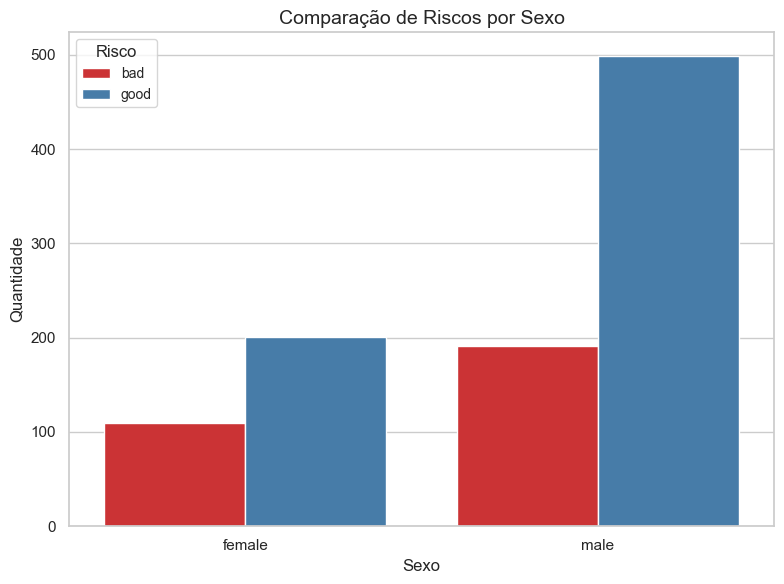

In [6]:
risk_sex_counts = df.groupby(['Sex', 'Risk']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(
    data=risk_sex_counts,
    x='Sex',
    y='Count',
    hue='Risk',
    palette='Set1'
)

plt.title('Comparação de Riscos por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.legend(title='Risco', fontsize=10)
plt.tight_layout()
plt.show()

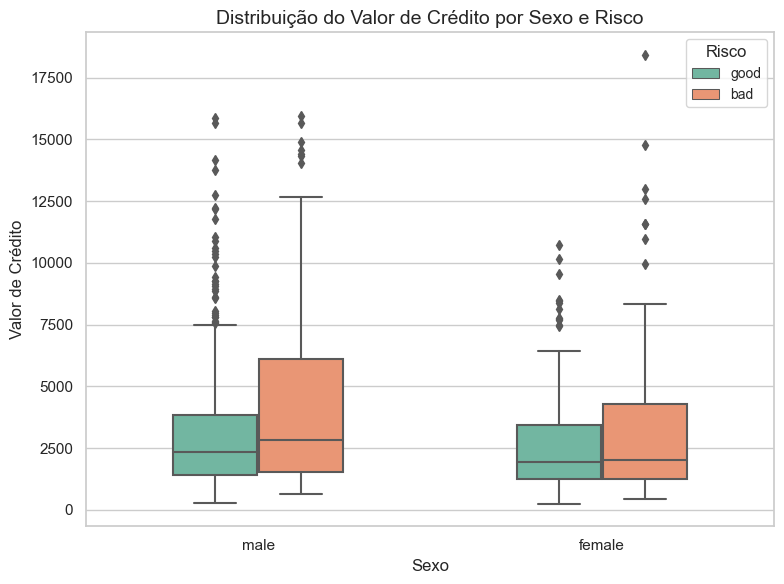

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Sex',
    y='Credit amount',
    hue='Risk',
    palette='Set2',
    width=0.5
)

plt.title('Distribuição do Valor de Crédito por Sexo e Risco', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Valor de Crédito', fontsize=12)
plt.legend(title='Risco', fontsize=10)
plt.tight_layout()
plt.show()

## Relação do risco e do crédito com o tipo de trabalho

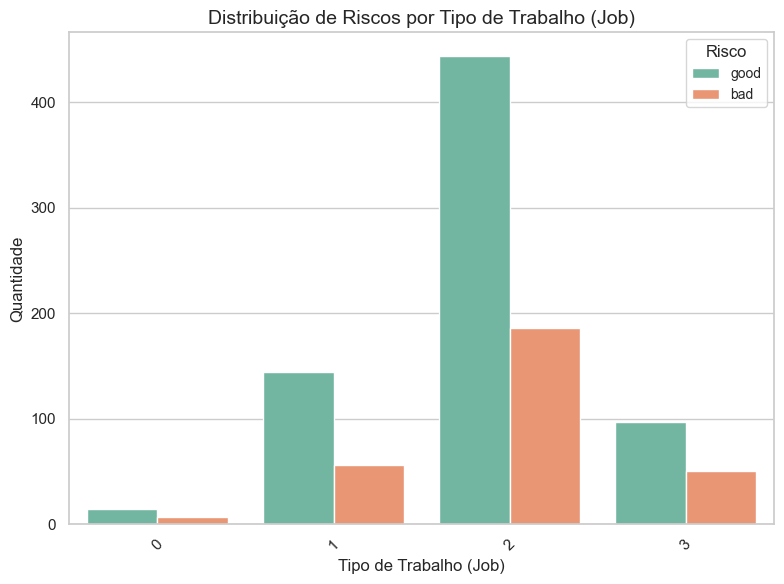

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='Job',
    hue='Risk',
    palette='Set2'
)
plt.title('Distribuição de Riscos por Tipo de Trabalho (Job)', fontsize=14)
plt.xlabel('Tipo de Trabalho (Job)', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.legend(title='Risco', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

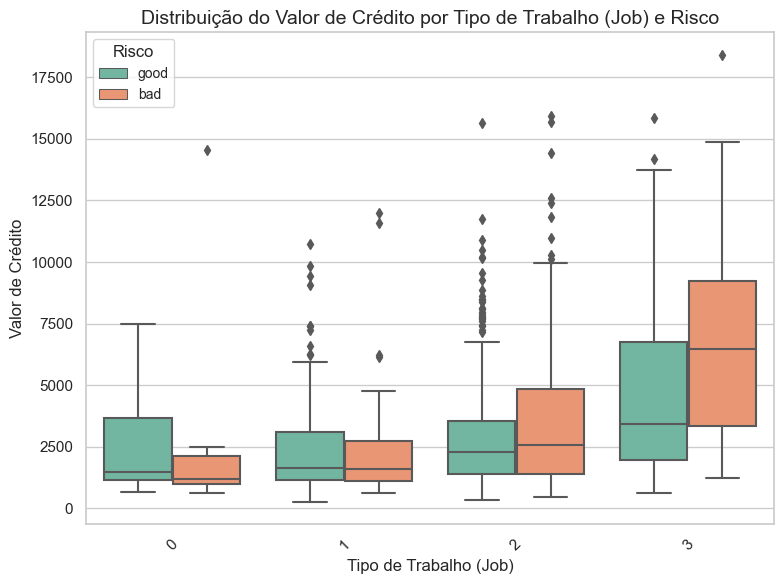

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Job',
    y='Credit amount',
    hue='Risk',
    palette='Set2'
)

plt.title('Distribuição do Valor de Crédito por Tipo de Trabalho (Job) e Risco', fontsize=14)
plt.xlabel('Tipo de Trabalho (Job)', fontsize=12)
plt.ylabel('Valor de Crédito', fontsize=12)
plt.legend(title='Risco', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Relação do risco com o propósito do empréstimo

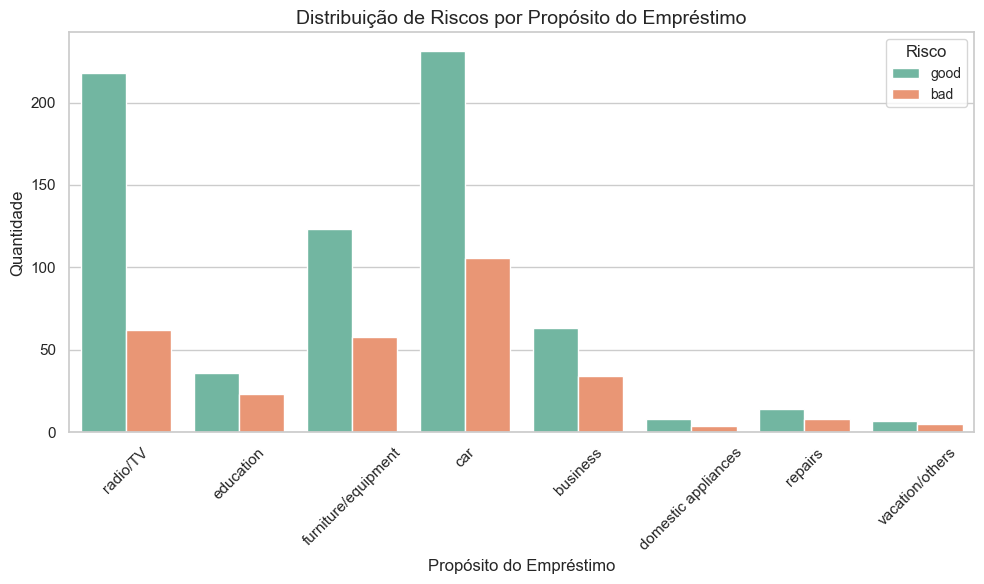

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Purpose',
    hue='Risk',
    palette='Set2'
)

plt.title('Distribuição de Riscos por Propósito do Empréstimo', fontsize=14)
plt.xlabel('Propósito do Empréstimo', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.legend(title='Risco', fontsize=10)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## Relação da poupança com o risco e com o valor do crédito

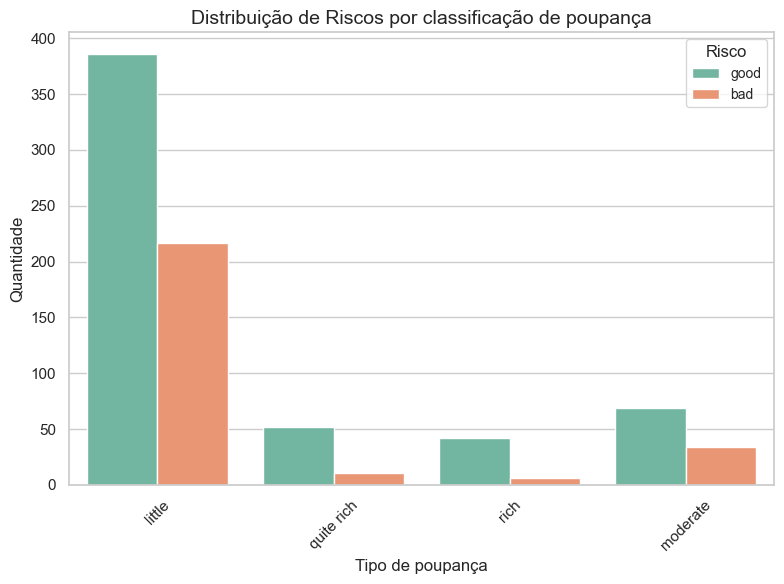

In [11]:
# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='Saving accounts',
    hue='Risk',
    palette='Set2'
)

# Personalizando o gráfico
plt.title('Distribuição de Riscos por classificação de poupança', fontsize=14)
plt.xlabel('Tipo de poupança', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.legend(title='Risco', fontsize=10)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()

# Exibindo o gráfico
plt.show()

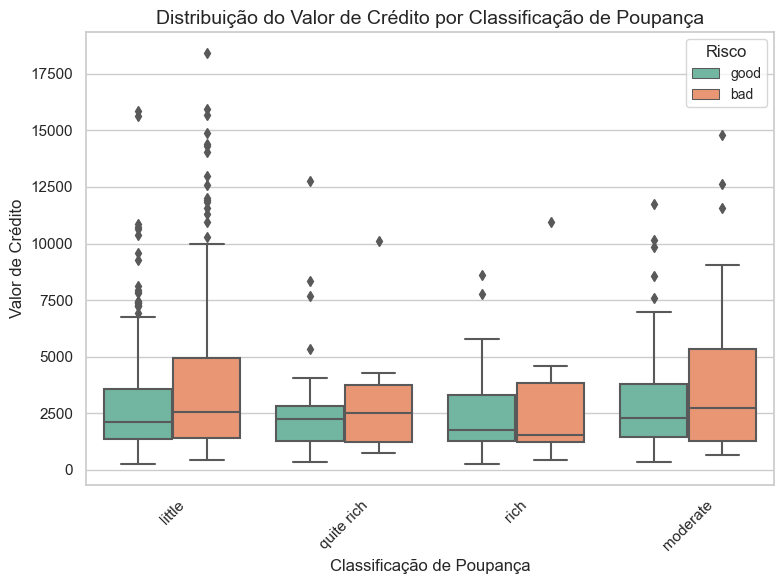

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Saving accounts',
    y='Credit amount',
    hue='Risk',
    palette='Set2'
)

plt.title('Distribuição do Valor de Crédito por Classificação de Poupança', fontsize=14)
plt.xlabel('Classificação de Poupança', fontsize=12)
plt.ylabel('Valor de Crédito', fontsize=12)
plt.legend(title='Risco', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observação da correlação entre as features

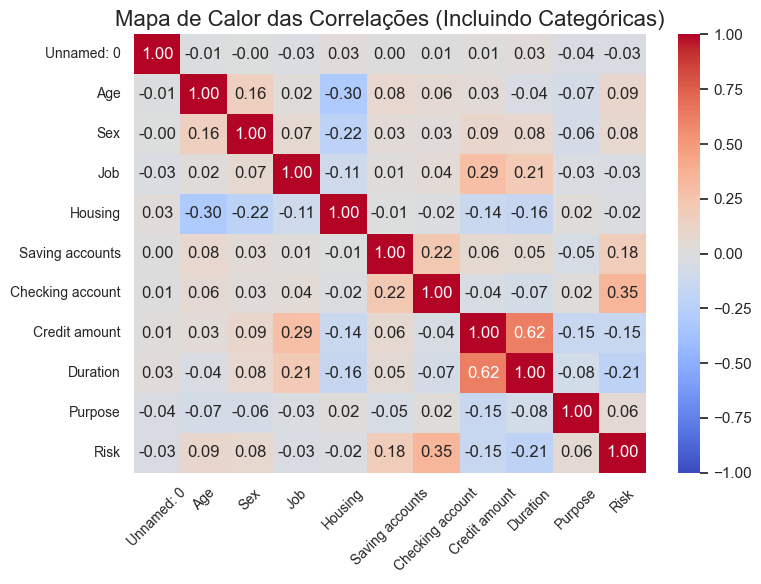

In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
categorical_columns = df_encoded.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Armazenando o encoder caso precise revertê-lo

correlation_matrix = df_encoded.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,          
    fmt=".2f",           
    cmap='coolwarm',     
    vmin=-1, vmax=1    
)

plt.title('Mapa de Calor das Correlações (Incluindo Categóricas)', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Desenvolvimento de modelo preditivo

In [14]:
df_encoded = df_encoded.drop(columns=['Unnamed: 0'])
df_encoded.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Risk'])
y = df_encoded['Risk']               

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=24, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=24, stratify=y_temp
)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((800, 9), (800,), (100, 9), (100,), (100, 9), (100,))

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix, f1_score,
                             matthews_corrcoef)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
from sklearn.metrics import ConfusionMatrixDisplay


def train_models(X_train, y_train, X_valid, y_valid, n_jobs=-1):

    models = []
    models.append(('LR', LogisticRegression(random_state=24, n_jobs=n_jobs, class_weight='balanced')))
    models.append(('RF', RandomForestClassifier(random_state=24, n_jobs=n_jobs, class_weight='balanced')))
    models.append(('LGBM', LGBMClassifier(random_state=24, n_jobs=n_jobs, class_weight='balanced', verbose=-1)))
    models.append(('XGB', XGBClassifier(random_state=24, n_jobs=n_jobs, class_weight='balanced', verbosity=0)))
    models.append(('MLP', MLPClassifier(random_state=24)))
    models.append(('SGD', SGDClassifier(random_state=24, n_jobs=n_jobs, class_weight='balanced')))
    models.append(('NB', MultinomialNB()))
    models.append(('LSVC', LinearSVC(random_state=24, class_weight='balanced', dual='auto')))
    models.append(('KNN', KNeighborsClassifier(n_jobs=n_jobs)))
    models.append(('DT', DecisionTreeClassifier(random_state=24, class_weight='balanced')))
    
    results = []
    creports = []
    
    for name, model in models:
        start_time = time.time()

        try:
            model.fit(X_train, y_train)
            pred = model.predict(X_valid)
            
        except Exception as e:
            print(f'Error {name} - {e}')
            continue 

        f1 = f1_score(y_valid, pred, average='micro')
        bacc = balanced_accuracy_score(y_valid, pred)
        acc = accuracy_score(y_valid, pred)
        cr = classification_report(y_valid, pred)
        mcc = matthews_corrcoef(y_valid, pred)
        cm = confusion_matrix(y_valid, pred)
        creports.append([name, cr, cm])

        elapsed = time.time() - start_time
        results.append([name, f1, bacc, acc, mcc, elapsed, cm, cr])

    columns = ['Model', 'F1', 'BACC', 'ACC', 'MCC', 'Total Time', 'Confusion Matrix', 'Classification Report']
    df_results = pd.DataFrame(results, columns=columns)
    df_results['Confusion Matrix'] = df_results['Confusion Matrix'].apply(lambda x: str(x))

    return df_results, creports

In [17]:
df_results, creports = train_models(X_train, y_train, X_valid, y_valid, n_jobs=-1)

In [18]:
df_results.sort_values(by='F1', ascending=False)

,Model,F1,BACC,ACC,MCC,Total Time,Confusion Matrix,Classification Report
1,RF,0.79,0.716667,0.79,0.471870,0.151097,[[16 14]\n [ 7 63]],precision recall f1-score ...
3,XGB,0.77,0.692857,0.77,0.420016,0.197999,[[15 15]\n [ 8 62]],precision recall f1-score ...
2,LGBM,0.75,0.707143,0.75,0.410492,0.041999,[[18 12]\n [13 57]],precision recall f1-score ...
7,LSVC,0.75,0.773810,0.75,0.504430,0.007999,[[25 5]\n [20 50]],precision recall f1-score ...
8,KNN,0.73,0.626190,0.73,0.294813,0.026004,[[11 19]\n [ 8 62]],precision recall f1-score ...
0,LR,0.72,0.723810,0.72,0.415604,2.479564,[[22 8]\n [20 50]],precision recall f1-score ...
9,DT,0.68,0.609524,0.68,0.223565,0.012000,[[13 17]\n [15 55]],precision recall f1-score ...
6,NB,0.66,0.633333,0.66,0.251762,0.007001,[[17 13]\n [21 49]],precision recall f1-score ...
4,MLP,0.50,0.604762,0.50,0.213844,0.094001,[[26 4]\n [46 24]],precision recall f1-score ...
5,SGD,0.35,0.535714,0.35,0.150188,0.007999,[[30 0]\n [65 5]],precision recall f1-score ...


# Variando os parâmetros para o melhor modelo (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=24)
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],  # Número de árvores
    'max_depth': [None, 10, 20, 30, 40],       # Profundidade máxima
    'min_samples_split': [2, 5, 10],           # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],             # Mínimo de amostras por folha
    'max_features': ['sqrt', 'log2', None],    # Número máximo de features a considerar em cada divisão
    'bootstrap': [True, False]                 # Amostragem com ou sem reposição
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,                     # Número de combinações aleatórias a testar
    scoring='accuracy',            # Métrica de avaliação
    cv=5,                          # Número de folds para validação cruzada
    verbose=2,                     # Nível de log
    random_state=24,
    n_jobs=-1                      # Paralelismo (usa todos os núcleos disponíveis)
)

random_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)

# Avaliando no conjunto de validação
y_pred = random_search.best_estimator_.predict(X_valid)
print("\nRelatório de classificação no conjunto de validação:")
print(classification_report(y_valid, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores hiperparâmetros encontrados:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Relatório de classificação no conjunto de validação:
              precision    recall  f1-score   support

           0       0.68      0.50      0.58        30
           1       0.81      0.90      0.85        70

    accuracy                           0.78       100
   macro avg       0.74      0.70      0.71       100
weighted avg       0.77      0.78      0.77       100



## Curva ROC com a melhor configuração

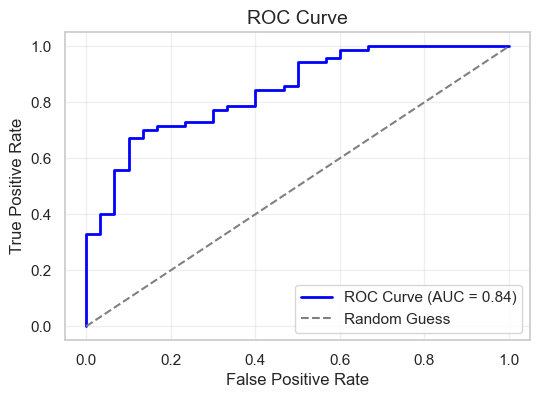

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = random_search.best_estimator_.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_prob)
auc_value = roc_auc_score(y_valid, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Desempenho final do modelo

In [25]:
y_pred_test = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45        30
           1       0.77      0.84      0.80        70

    accuracy                           0.71       100
   macro avg       0.64      0.62      0.63       100
weighted avg       0.69      0.71      0.70       100

